# Lecture 01
## Seaborn

Seaborn is also a plotting library for python. It is a wrapper for matplotlib and makes it easy to make certain kinds of plots with a single command. However, with the trade-off between ease of use and flexibility, I find seaborn to not be as flexible when it comes to certain things and matplotlib has to be used in those scenarios.

In [ ]:
%pip install --user seaborn

In [1]:
import seaborn as sns

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Let us load the iris data set we saw in last class. Is this a long-form or wide-form dataframe?

In [3]:
iris = pd.read_csv('./Data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
titanic=pd.read_csv('./Data/titanic.csv')
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Relational plots

And try to plot this using matplotlib.

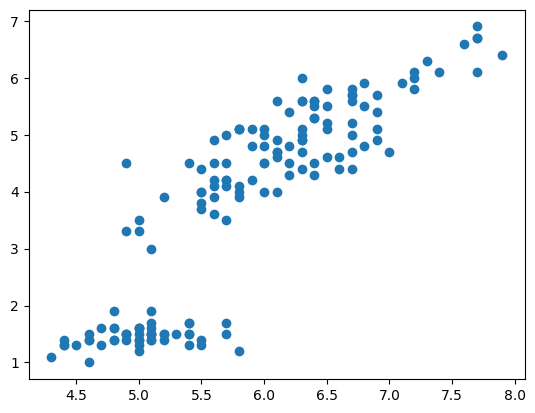

In [5]:
x=iris.sepal_length.values
y=iris.petal_length.values
plt.scatter(x,y)

We can do the same thing with seaborn.

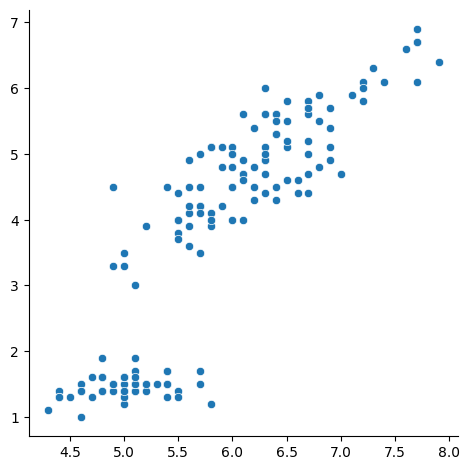

In [6]:
sns.relplot(x=x,y=y)

But it is pretty pointless to use seaborn if we do it in such a way. We can provide the dataframe directly to seaborn and specify the columns for x and y values.

We can also see that axes labels are also generated from the column names.

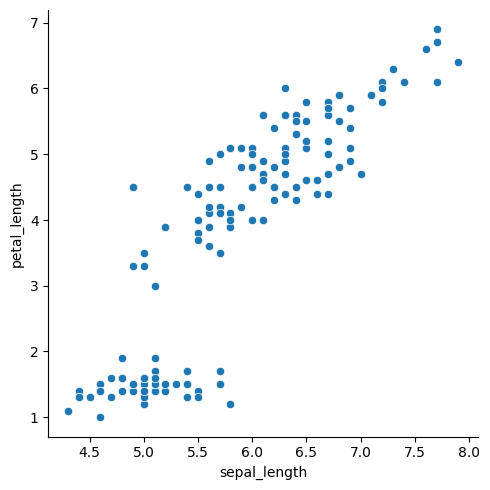

In [7]:
sns.relplot(data=iris,x='sepal_length',y='petal_length')

By default, relplot uses scatter. However, we can also call the scatterplot explicitly.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

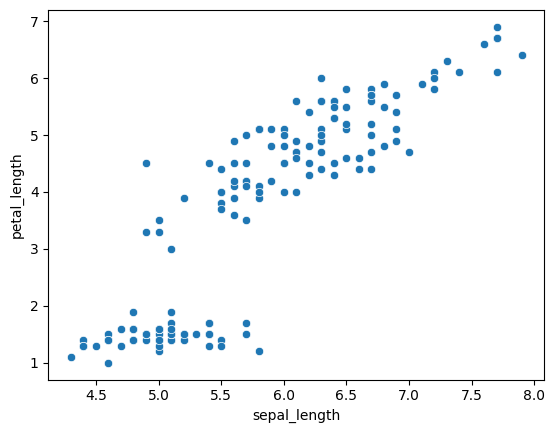

In [8]:
sns.scatterplot(data=iris,x='sepal_length',y='petal_length')

We can also provide the colour to be determined by the value in another column. Seaborn is best used when the data is in long form.$^*$ 

Note that the data for species is discrete.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

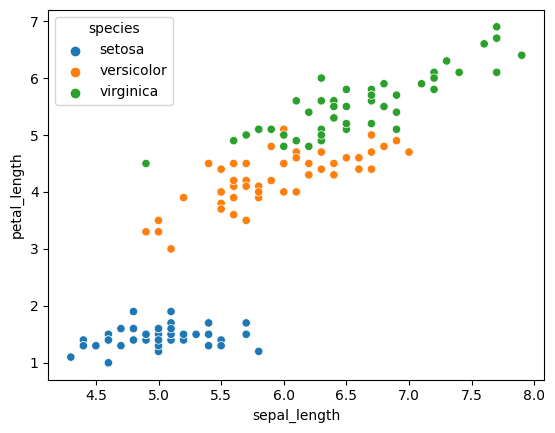

In [9]:
sns.scatterplot(data=iris,x='sepal_length',y='petal_length',hue='species')

Similarly, we can also set the marker style to be dependent on a column.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

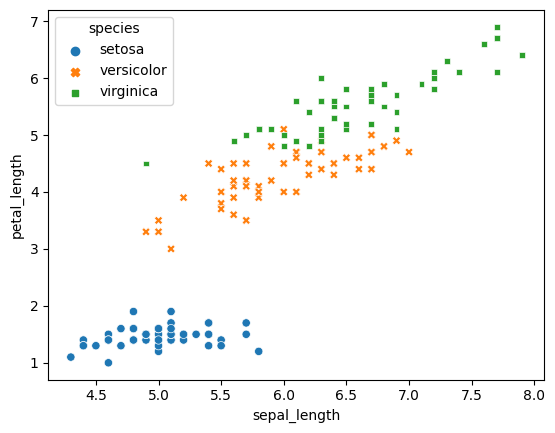

In [10]:
sns.scatterplot(data=iris,x='sepal_length',y='petal_length',hue='species',style='species')

However, when the data is continuous, seaborn chooses a sequential colourmap. 

<Axes: xlabel='sepal_length', ylabel='petal_length'>

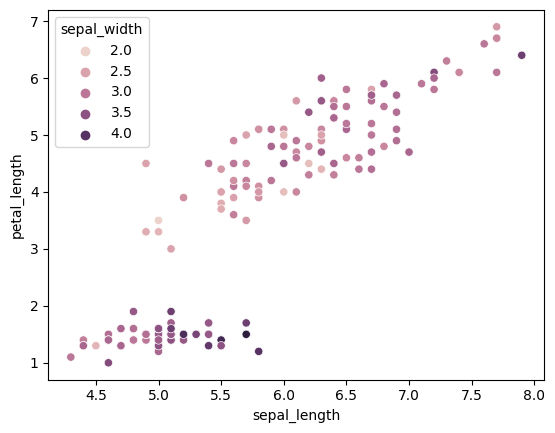

In [11]:
sns.scatterplot(data=iris,x='sepal_length',y='petal_length',hue='sepal_width')

We can set our own colourmap with palette. However, it is not recommended to use sequential colourmap when the data is discrete as it makes it hard to distinguish categories.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

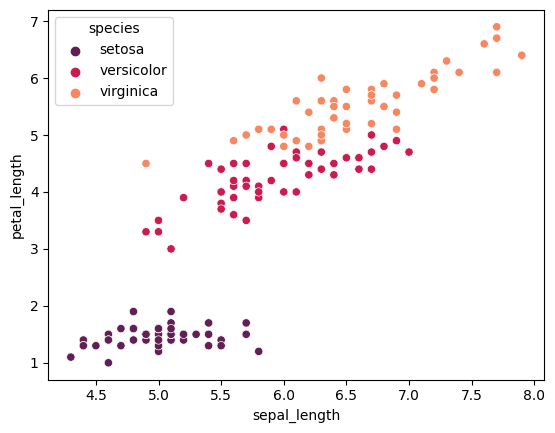

In [12]:
sns.scatterplot(data=iris,x='sepal_length',y='petal_length',hue='species',palette='rocket')

Similary, we can also provide a column for the size of the datapoints.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

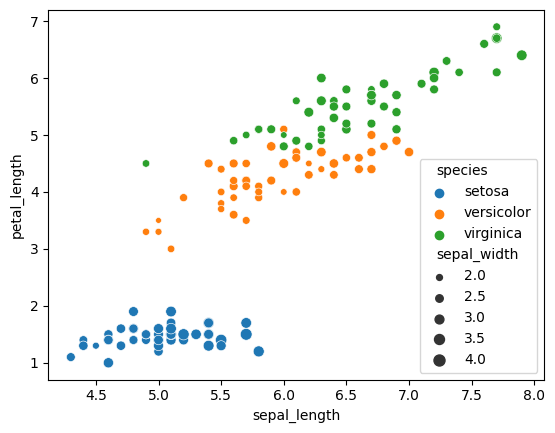

In [13]:
sns.scatterplot(data=iris,x='sepal_length',y='petal_length',size='sepal_width',hue='species')

We can also easily make subplots with seaborn. Note that this is only available with relplot and not scatterplot.

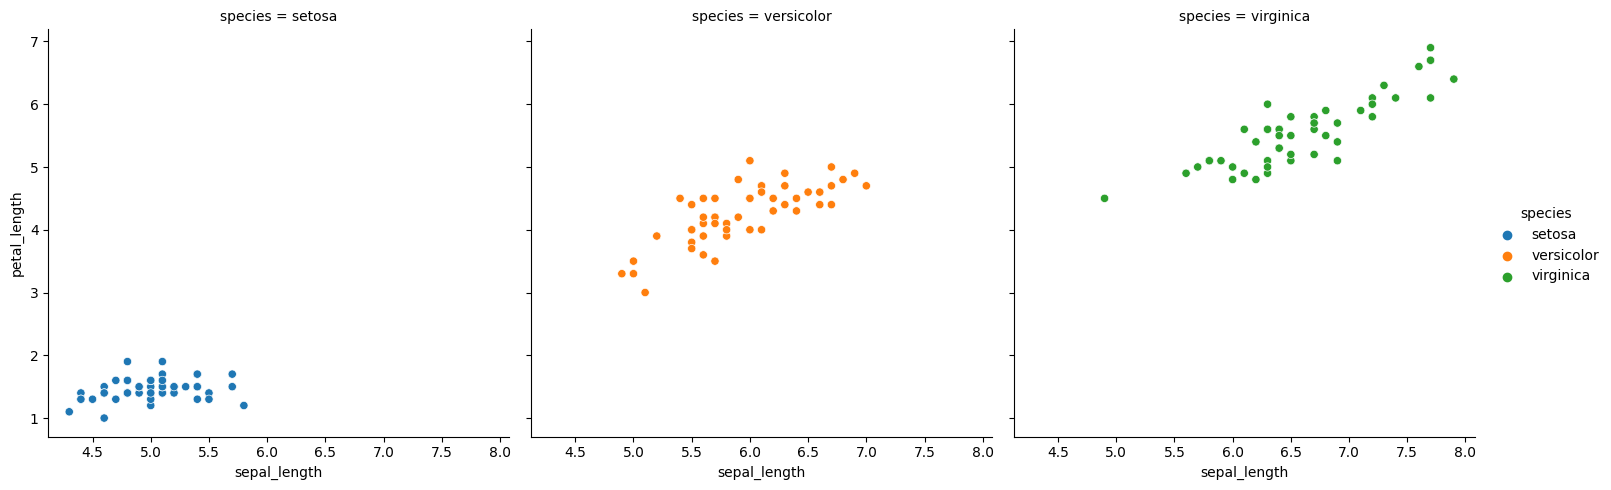

In [14]:
sns.relplot(data=iris, x='sepal_length', y='petal_length', col='species',hue='species')

However, we can manually define our cols with FacetGrid and use scatterplot with it.

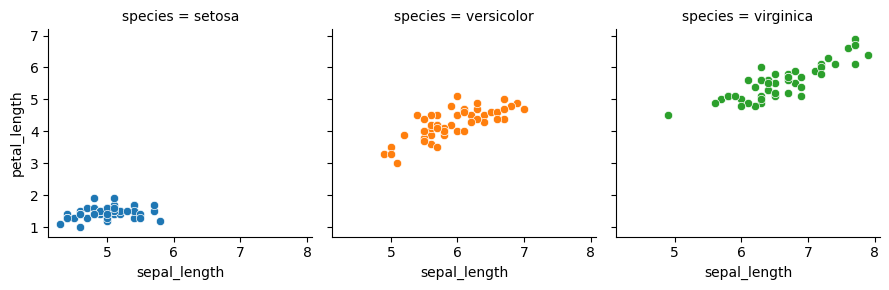

In [15]:
g = sns.FacetGrid(data=iris,col='species',hue='species')
g.map(sns.scatterplot,'sepal_length','petal_length')

We can also do pairwise plots between each columns.

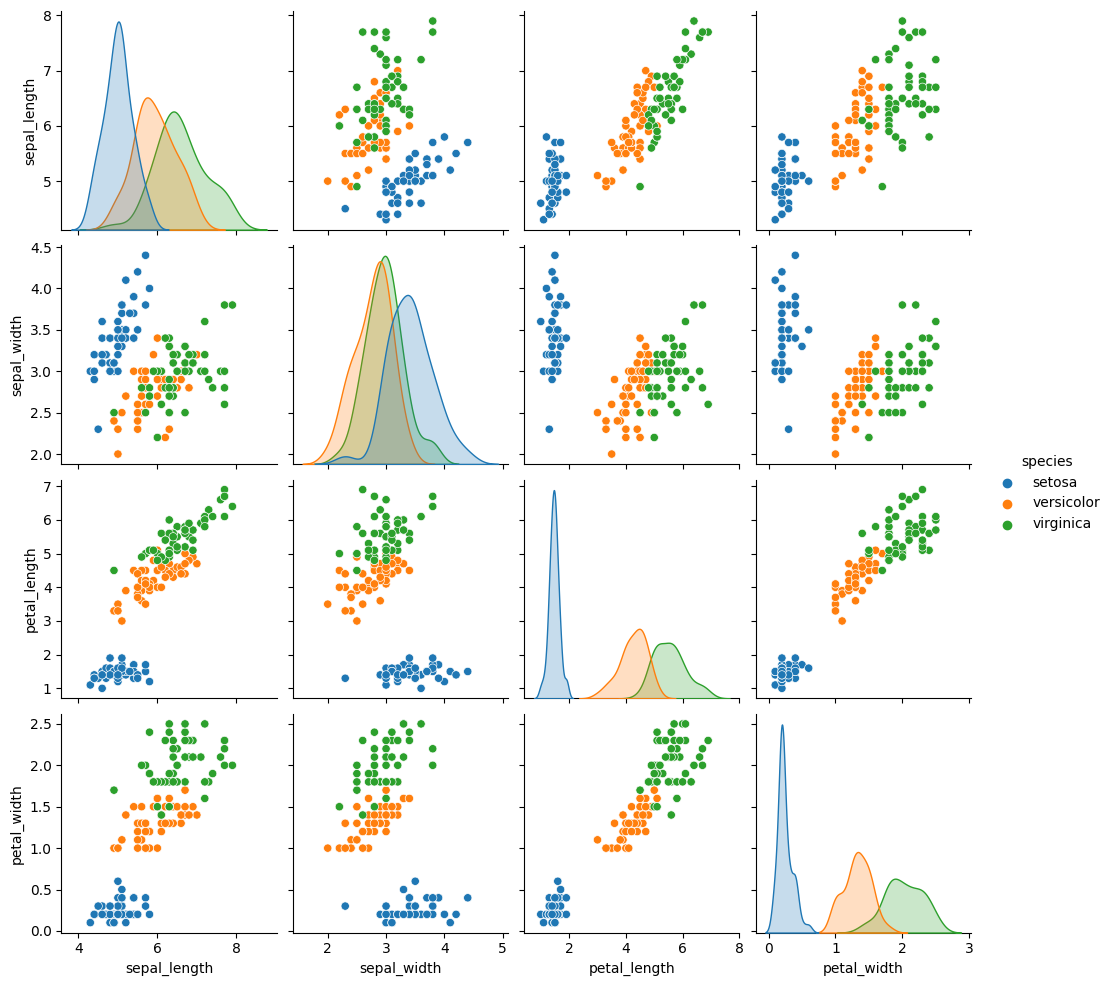

In [16]:
sns.pairplot(data=iris, hue='species')

And similarly, we can do it manually after specifying the PairGrid.

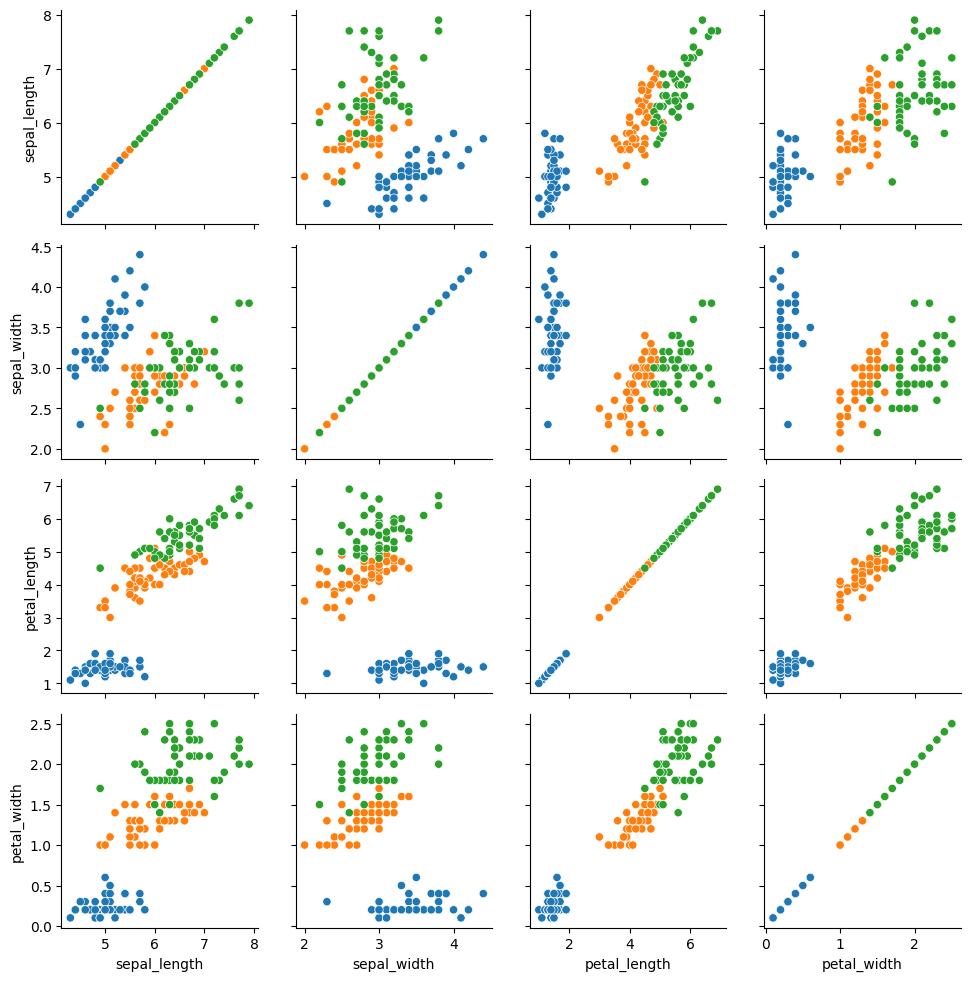

In [17]:
g = sns.PairGrid(iris,hue='species')
g.map(sns.scatterplot)

Here, we are loading an example dataset provided by seaborn.

In [18]:
flights = sns.load_dataset('flights')
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


And sum the passengers for each year. 

In [19]:
sum_flights= flights.groupby('year').sum(numeric_only=True).reset_index()
sum_flights

,year,passengers
0,1949,1520
1,1950,1676
2,1951,2042
3,1952,2364
4,1953,2700
5,1954,2867
6,1955,3408
7,1956,3939
8,1957,4421
9,1958,4572


replot can also plot lineplots given the data is continuous. 

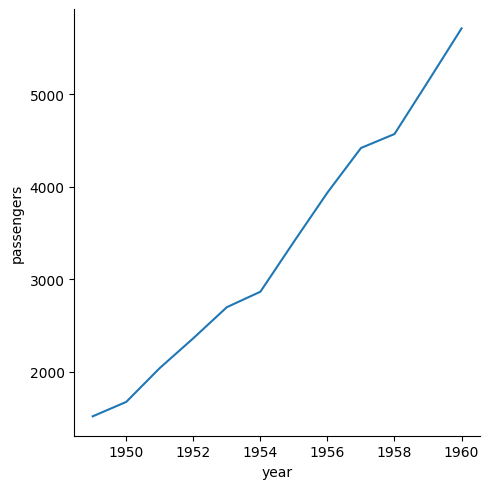

In [20]:
sns.relplot(data=sum_flights, x='year', y='passengers', kind='line')

Or we can use the equivalent explicit command for a lineplot.

<Axes: xlabel='year', ylabel='passengers'>

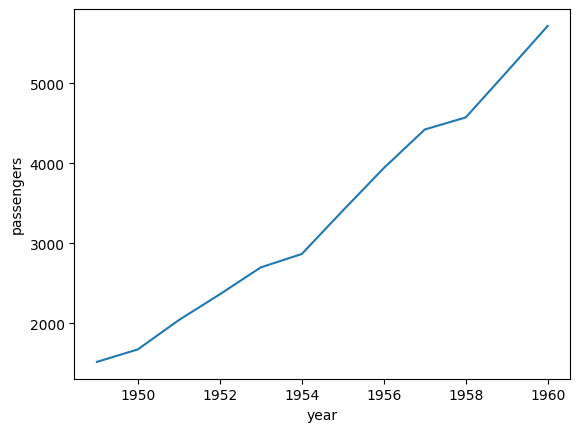

In [21]:
sns.lineplot(data=sum_flights, x='year', y='passengers')

When we pass the original dataframe. We see that the mean of the points for each x-value is taken.

<Axes: xlabel='year', ylabel='passengers'>

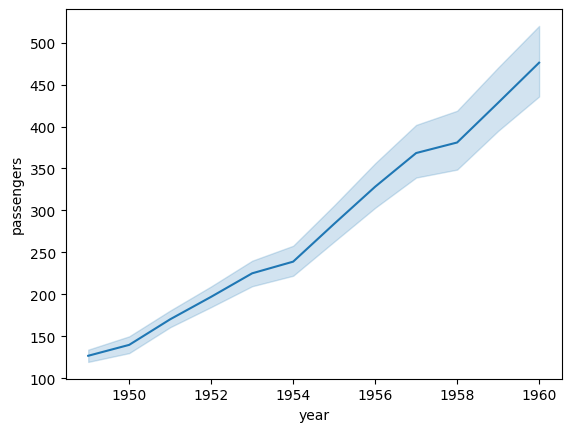

In [22]:
sns.lineplot(data=flights, x='year', y='passengers')

By default this error margin is taken to be 95% confidence interval. We can change it as standard deviation as such.

<Axes: xlabel='year', ylabel='passengers'>

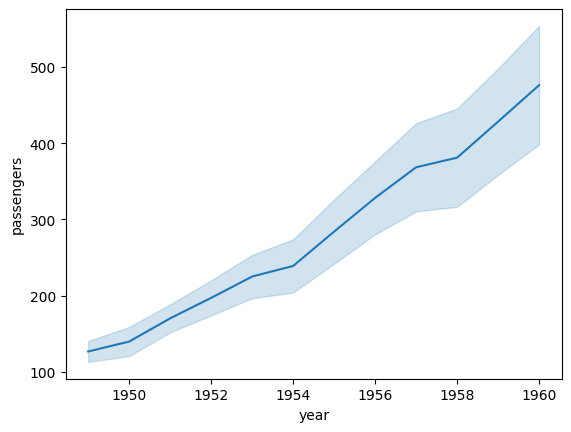

In [23]:
sns.lineplot(data=flights, x='year', y='passengers',errorbar='sd')

If we plot month-wise there is just 1 data-point per x per line. So we don't have error bars now.

<Axes: xlabel='year', ylabel='passengers'>

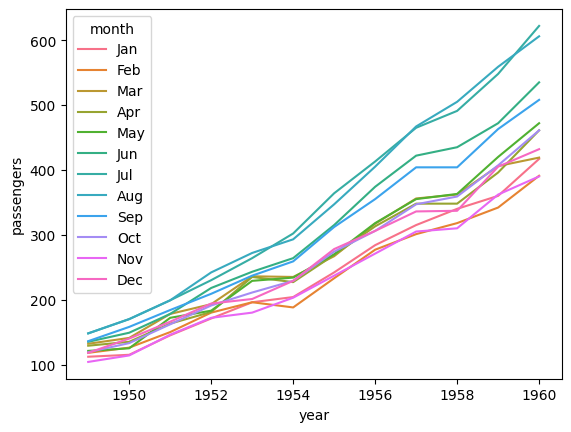

In [24]:
sns.lineplot(data=flights, x='year', y='passengers',hue='month')

We can also get regressions in our plots.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

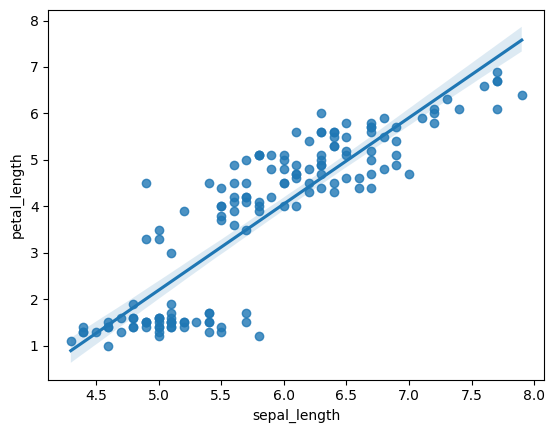

In [25]:
sns.regplot(iris,x='sepal_length',y='petal_length')

If we want to do more complex regressions, we can use lmplot. Here, we can specify hue and get regressions for each species.

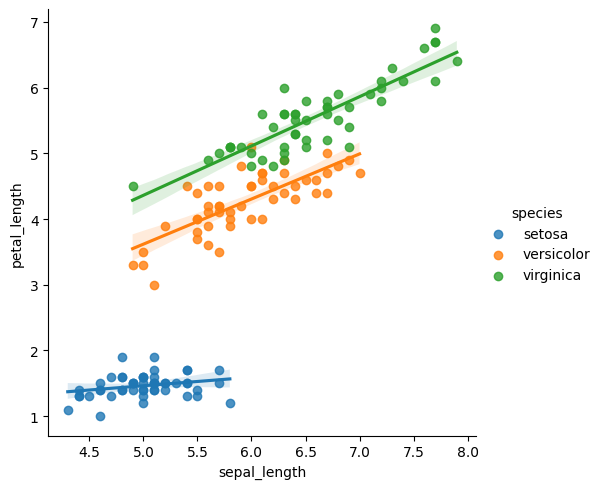

In [26]:
sns.lmplot(iris,x='sepal_length',y='petal_length',hue='species')

### Distribution plots

We can plot distributions of data with seaborn.

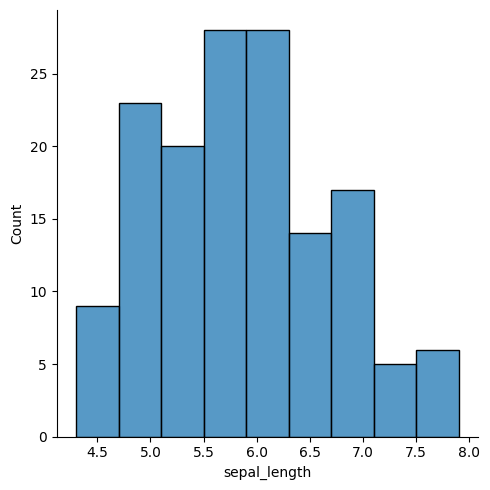

In [27]:
sns.displot(iris,x='sepal_length')

And there is an explicit command for of histogram.

<Axes: xlabel='sepal_length', ylabel='Count'>

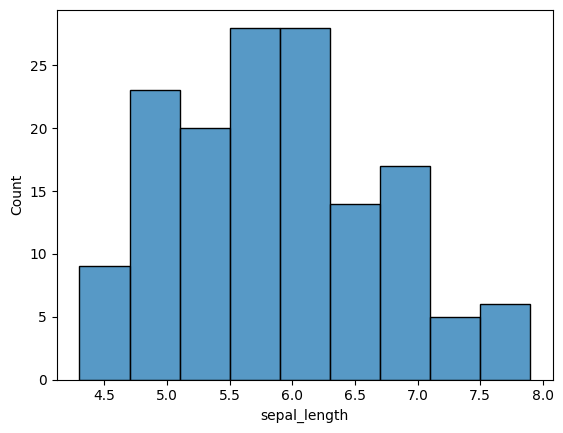

In [28]:
sns.histplot(iris,x='sepal_length')

Like, before let us provide species column as the hue.

<Axes: xlabel='sepal_length', ylabel='Count'>

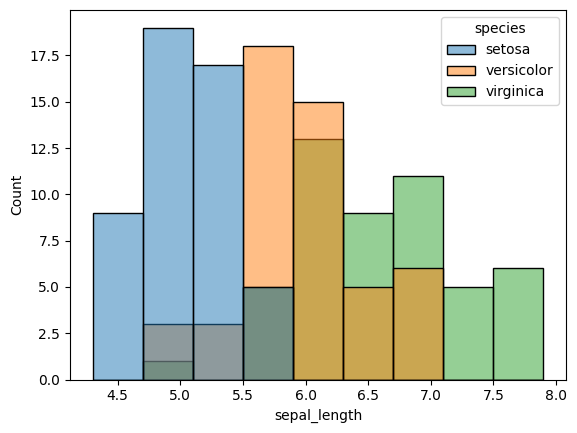

In [29]:
sns.histplot(iris,x='sepal_length',hue='species')

Just like matplotlib we can specify the number of bins.

<Axes: xlabel='sepal_length', ylabel='Count'>

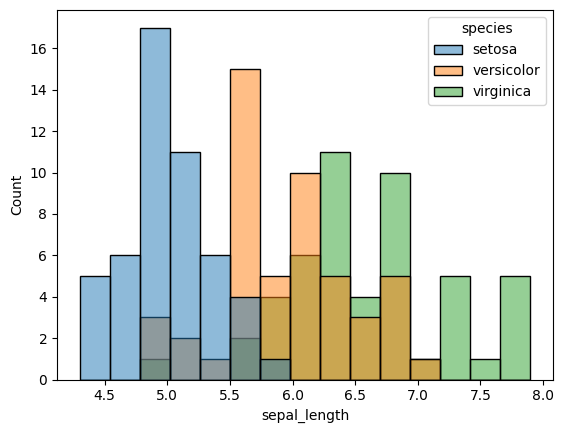

In [30]:
sns.histplot(iris,x='sepal_length',hue='species',bins=15)

Or we can specify the width of the bins to use.

<Axes: xlabel='sepal_length', ylabel='Count'>

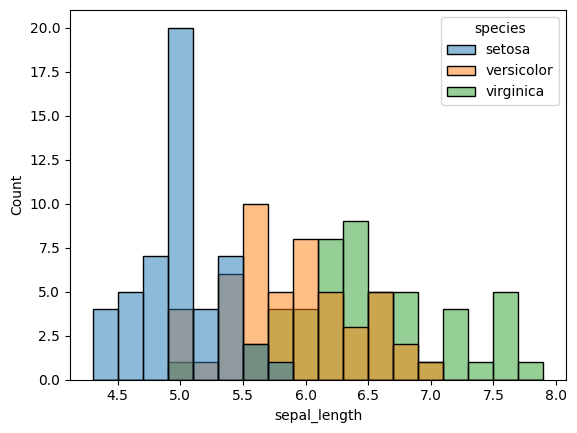

In [31]:
sns.histplot(iris,x='sepal_length',hue='species',binwidth=0.2)

The previous commands used counts for the height of histogram. We can also change it to use the density.

<Axes: xlabel='sepal_length', ylabel='Density'>

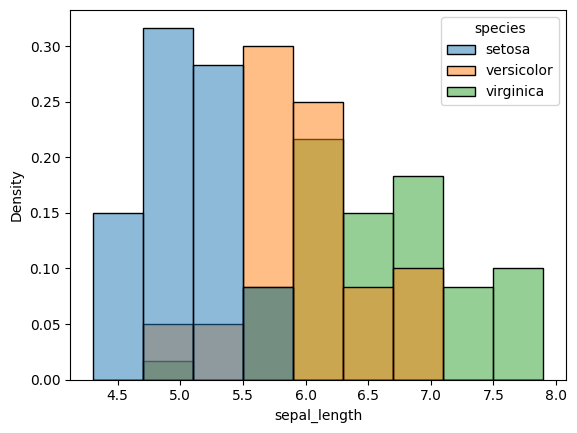

In [32]:
sns.histplot(iris,x='sepal_length',hue='species',stat='density')

In cases where the number of datapoints are different, we can set the norm to be different for each category (hue).

<Axes: xlabel='sepal_length', ylabel='Density'>

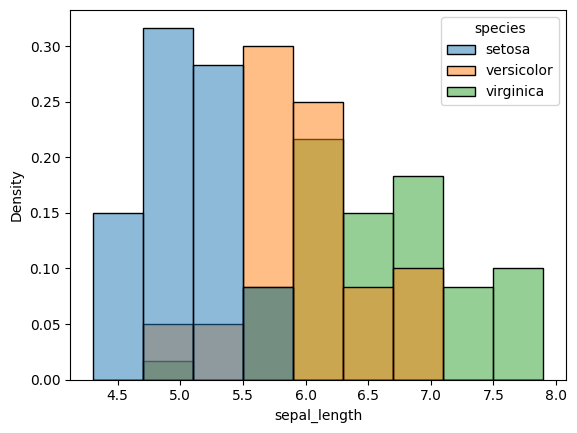

In [33]:
sns.histplot(iris,x='sepal_length',hue='species',stat='density',common_norm='False')

Additionally, seaborn has a way to plot kernel density estimation (KDE) of the distribution.

<Axes: xlabel='sepal_length', ylabel='Density'>

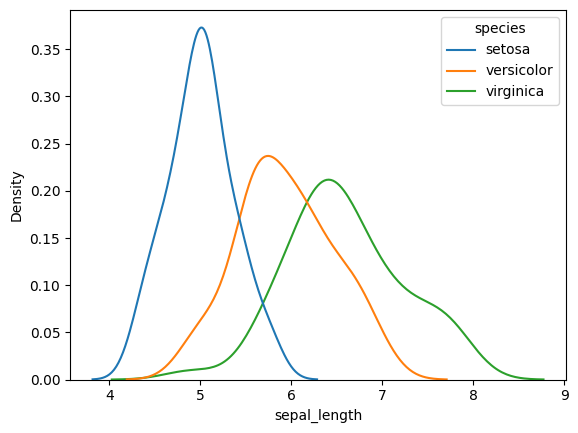

In [34]:
sns.kdeplot(iris,x='sepal_length',hue='species')

The bandwidth can be adjust to vary the smoothing.

<Axes: xlabel='sepal_length', ylabel='Density'>

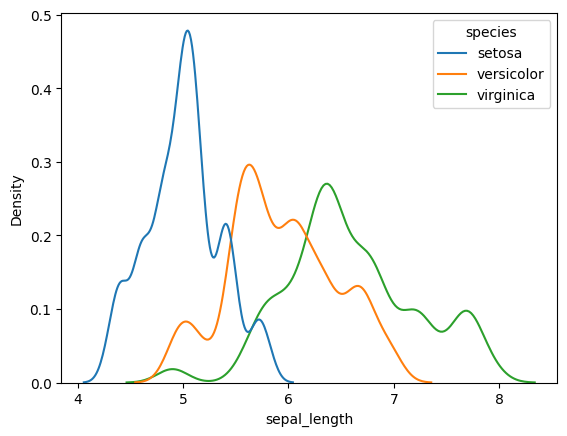

In [35]:
sns.kdeplot(iris,x='sepal_length',hue='species',bw_adjust=0.5)

These plots can be stacked on top of each other.

<Axes: xlabel='sepal_length', ylabel='Density'>

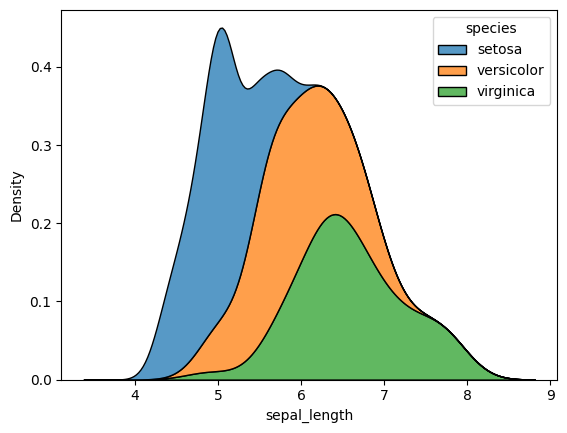

In [36]:
sns.kdeplot(iris,x='sepal_length',hue='species',multiple='stack')

Speaking of stacking, we can plot the cumulative distribution functions with seaborn.

<Axes: xlabel='sepal_length', ylabel='Proportion'>

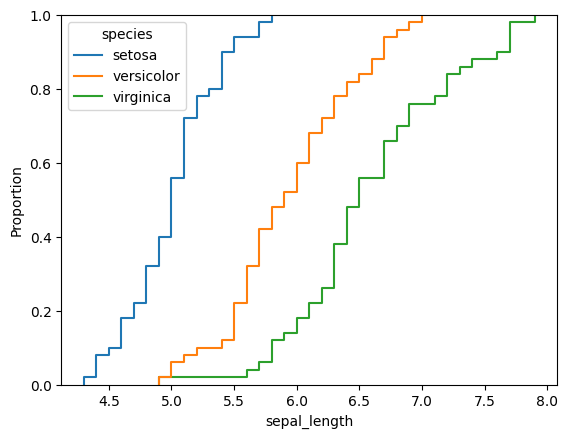

In [37]:
sns.ecdfplot(iris, x='sepal_length',hue='species')

We can also use these functions to plot bivariate distributions. [2D function: f(x,y)]

<Axes: xlabel='sepal_length', ylabel='petal_length'>

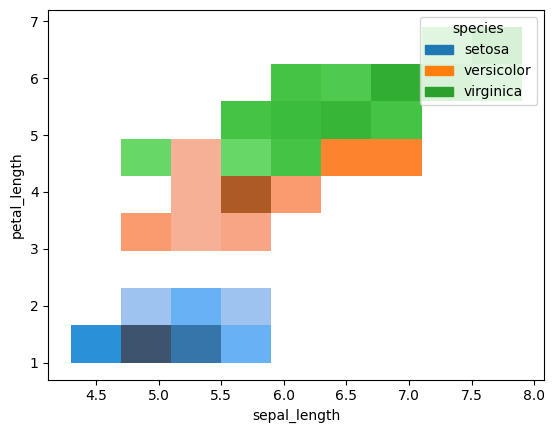

In [38]:
sns.histplot(iris,x='sepal_length',y='petal_length',hue='species')

histplot gives something similar to a heatmap, whereas kdeplot gives contour lines.

<Axes: xlabel='sepal_length', ylabel='petal_length'>

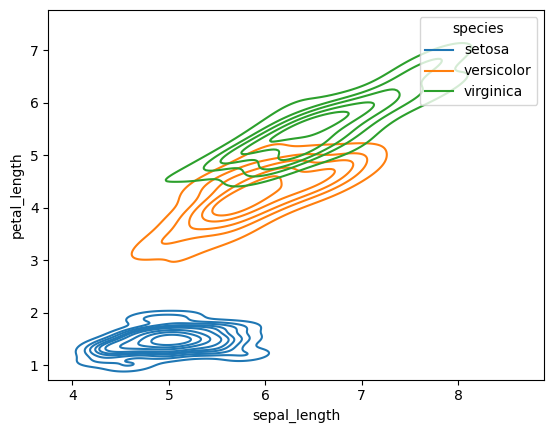

In [39]:
sns.kdeplot(iris,x='sepal_length',y='petal_length',hue='species')

We can use these bivariate distribution plots for the pair grid plots we did before.

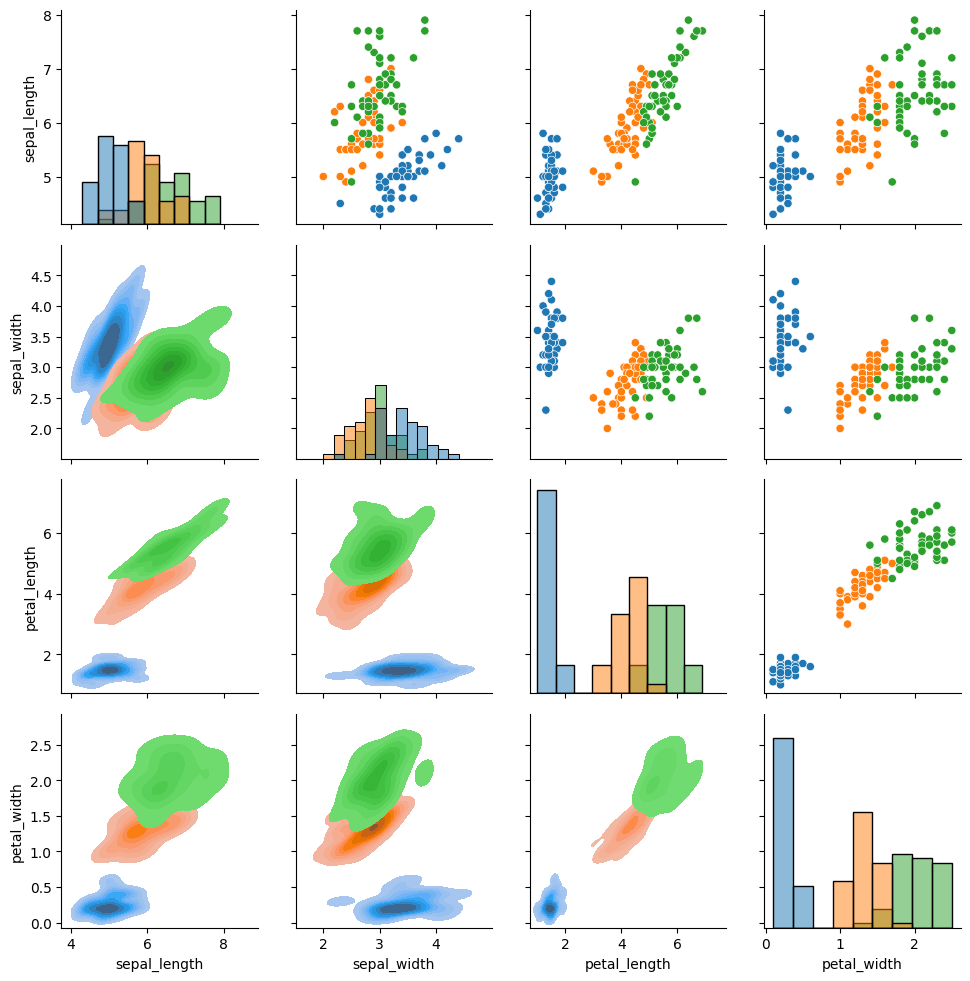

In [40]:
g = sns.PairGrid(iris,hue='species')
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot)

We can use jointplot to plot the distribution along each axis and a bivariate distribution together.

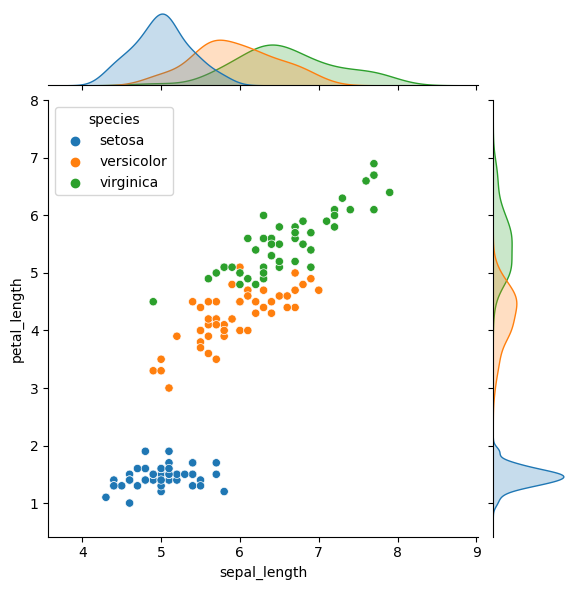

In [41]:
sns.jointplot(iris,x='sepal_length',y='petal_length',hue='species')

Just like FacetGrid we can make a JointGrid and plot for the joint and marginal axes.

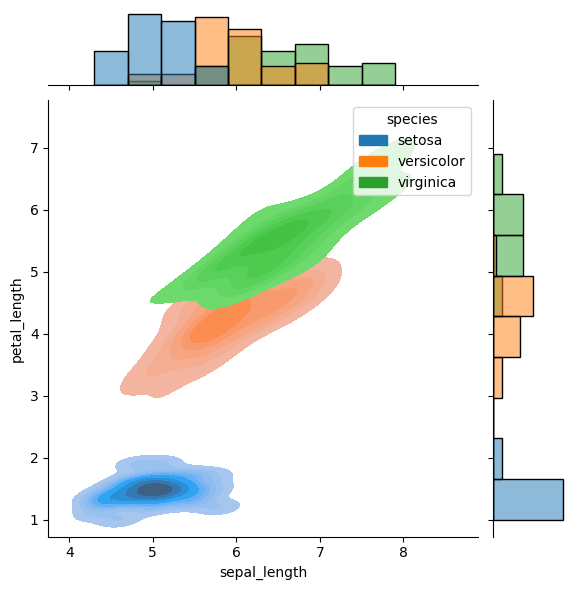

In [42]:
g = sns.JointGrid(data=iris, x='sepal_length', y='petal_length', hue='species')
g.plot_joint(sns.kdeplot,fill=True)
g.plot_marginals(sns.histplot)

### Categorical plots

Let us make a barplot for proportion of males and females who survived from the titantic.

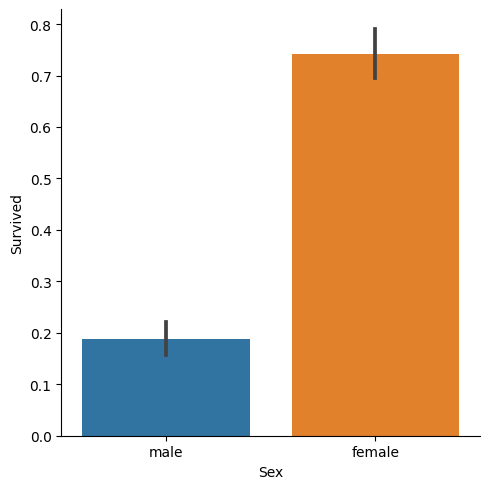

In [43]:
sns.catplot(titanic,x='Sex',y='Survived',kind='bar')

And the explicit version of barplot.

<Axes: xlabel='Sex', ylabel='Survived'>

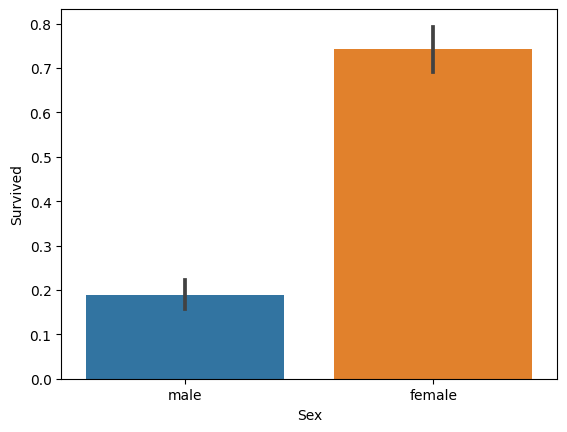

In [44]:
sns.barplot(titanic,x='Sex',y='Survived')

Unlike matplotlib, dodging is handled automatically.

<Axes: xlabel='Sex', ylabel='Survived'>

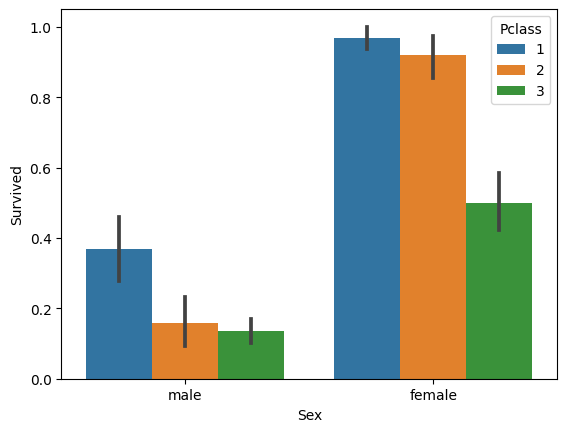

In [45]:
sns.barplot(titanic,x='Sex',y='Survived',hue='Pclass')

countplot is a type of barplot where you get the count of observations in each category.  

<Axes: xlabel='Sex', ylabel='count'>

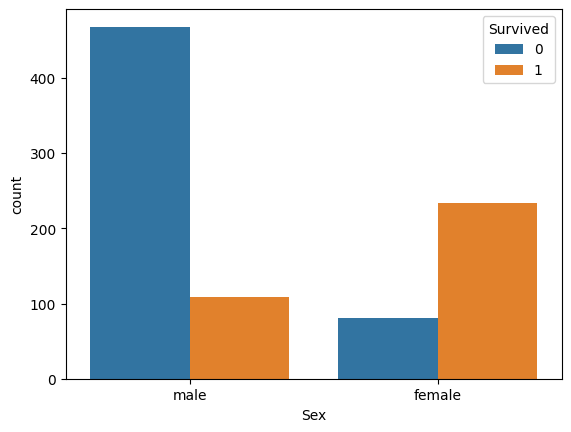

In [46]:
sns.countplot(titanic,x='Sex',hue='Survived')

Instead of bars, we can represent the same as points with errorbars.

<Axes: xlabel='Pclass', ylabel='Survived'>

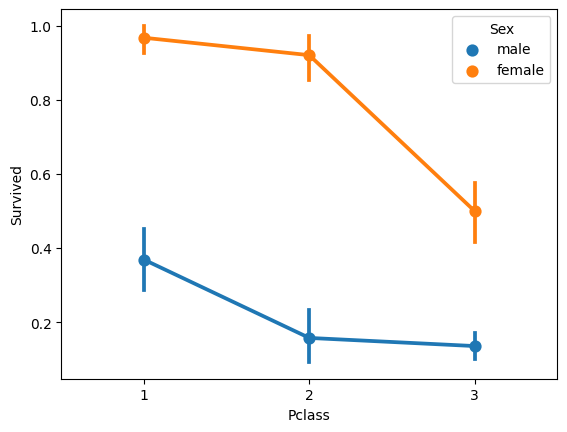

In [47]:
sns.pointplot(titanic,x='Pclass',y='Survived',hue='Sex')

Just like we saw in matplotlib, we have boxplots 

<Axes: xlabel='species', ylabel='sepal_width'>

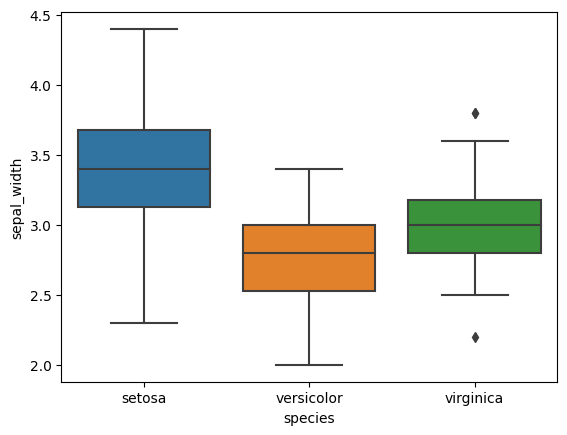

In [48]:
sns.boxplot(iris,x='species',y='sepal_width')

And violinplots which are the KDE equivalent of boxplots.

<Axes: xlabel='species', ylabel='sepal_width'>

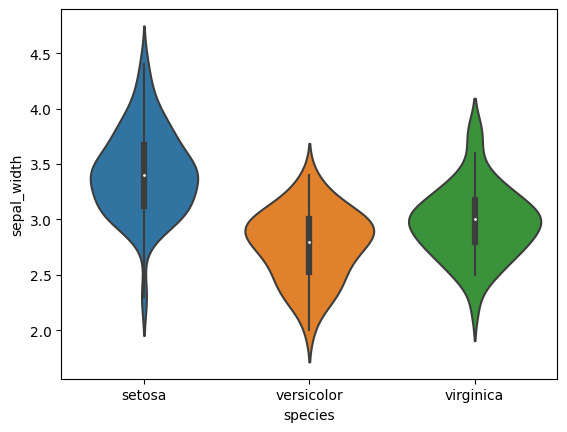

In [49]:
sns.violinplot(iris,x='species',y='sepal_width')

### Matrix plots


Let us read an interesting dataframe. Can anyone guess what this is?

In [50]:
sim_score2 = pd.read_csv('./Data/SimScore2.csv',index_col=0)
sim_score2

,krishna sanil.py,Diya Krishna.py,Farhan Younus Khan.py,monika shree.py,Malavika Krishna.py,Ganavi Babu.py,Priyanka Priya.py,jumaana saleem.py,Syed Sufiyaan.py,Nikhil Kushwaha.py,...,akshita.py,Prem Sai Alibilli.py,Meghana Guvvala.py,Mohd Huzaif.py,Suyash Pathak.py,Archana Premlal.py,Nandana.py,Shashank.py,K Shruthi.py,Ansh.py
krishna sanil.py,1.000000,0.148515,0.419355,0.128440,0.163636,0.163636,0.311828,0.290323,0.075269,0.344086,...,0.086022,0.333333,0.333333,0.053763,0.086022,0.322581,0.311828,0.118280,0.080000,0.559140
Diya Krishna.py,0.148515,1.000000,0.108911,0.522936,0.527273,0.527273,0.118812,0.108911,0.069307,0.138614,...,0.079208,0.118812,0.138614,0.069307,0.118812,0.118812,0.128713,0.089109,0.089109,0.128713
Farhan Younus Khan.py,0.419355,0.108911,1.000000,0.110092,0.109091,0.109091,0.204819,0.243902,0.060976,0.195402,...,0.085366,0.214286,0.192771,0.060976,0.085366,0.202381,0.170732,0.109756,0.080000,0.666667
monika shree.py,0.128440,0.522936,0.110092,1.000000,0.809091,0.809091,0.128440,0.119266,0.064220,0.128440,...,0.082569,0.128440,0.119266,0.064220,0.064220,0.119266,0.100917,0.073394,0.100917,0.110092
Malavika Krishna.py,0.163636,0.527273,0.109091,0.809091,1.000000,1.000000,0.127273,0.127273,0.081818,0.154545,...,0.090909,0.145455,0.136364,0.072727,0.072727,0.154545,0.136364,0.072727,0.100000,0.118182
Ganavi Babu.py,0.163636,0.527273,0.109091,0.809091,1.000000,1.000000,0.127273,0.127273,0.081818,0.154545,...,0.090909,0.145455,0.136364,0.072727,0.072727,0.154545,0.136364,0.072727,0.100000,0.118182
Priyanka Priya.py,0.311828,0.118812,0.204819,0.128440,0.127273,0.127273,1.000000,0.457831,0.060241,0.804598,...,0.096386,0.880952,0.891566,0.072289,0.072289,0.892857,0.759036,0.096386,0.080000,0.273810
jumaana saleem.py,0.290323,0.108911,0.243902,0.119266,0.127273,0.127273,0.457831,1.000000,0.120690,0.482759,...,0.137931,0.464286,0.445783,0.120690,0.075949,0.464286,0.402439,0.103896,0.080000,0.297619
Syed Sufiyaan.py,0.075269,0.069307,0.060976,0.064220,0.081818,0.081818,0.060241,0.120690,1.000000,0.103448,...,0.157895,0.083333,0.084337,0.157895,0.075949,0.071429,0.097561,0.051948,0.090000,0.059524
Nikhil Kushwaha.py,0.344086,0.138614,0.195402,0.128440,0.154545,0.154545,0.804598,0.482759,0.103448,1.000000,...,0.114943,0.827586,0.827586,0.080460,0.091954,0.816092,0.724138,0.080460,0.080000,0.275862


With this matrix, we can generate a heatmap where 

<Axes: >

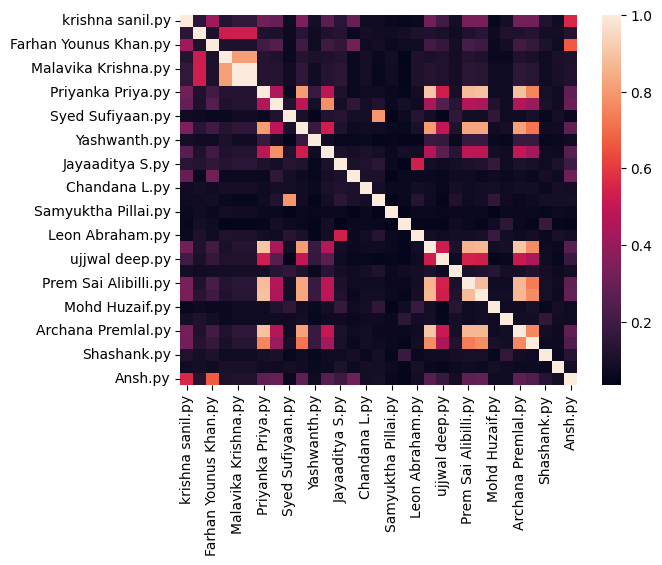

In [51]:
sns.heatmap(sim_score2)

Another thing is we can use matplotlib functions along with seaborn.

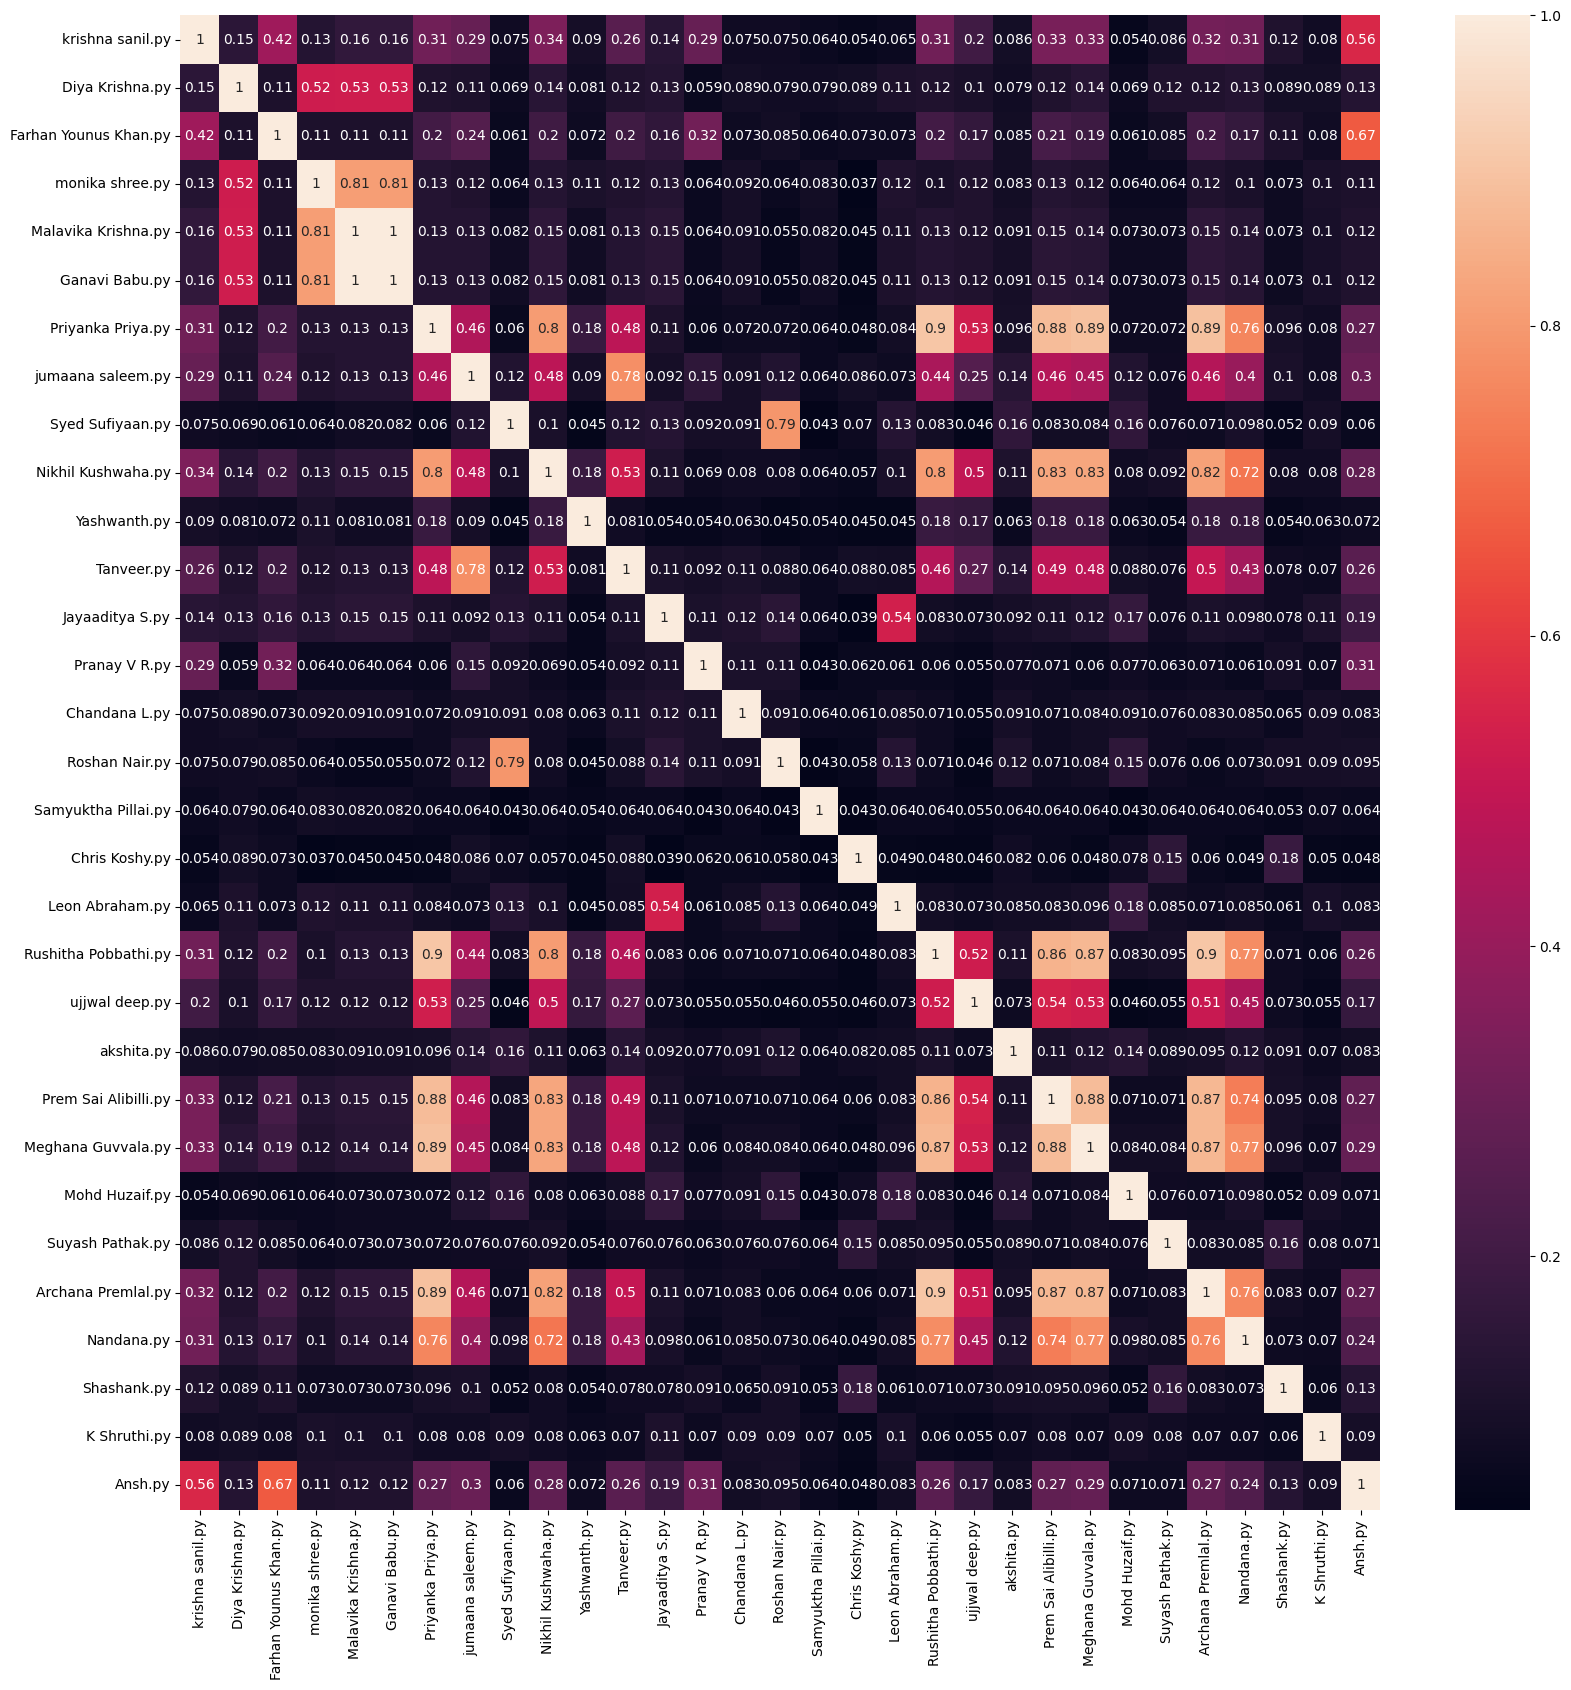

In [52]:
plt.figure(figsize=(17,17))
sns.heatmap(sim_score2,annot=True)
plt.tight_layout()

In addition to plotting heatmaps, clustermap groups the rows and columns together such that more similar values occur together.

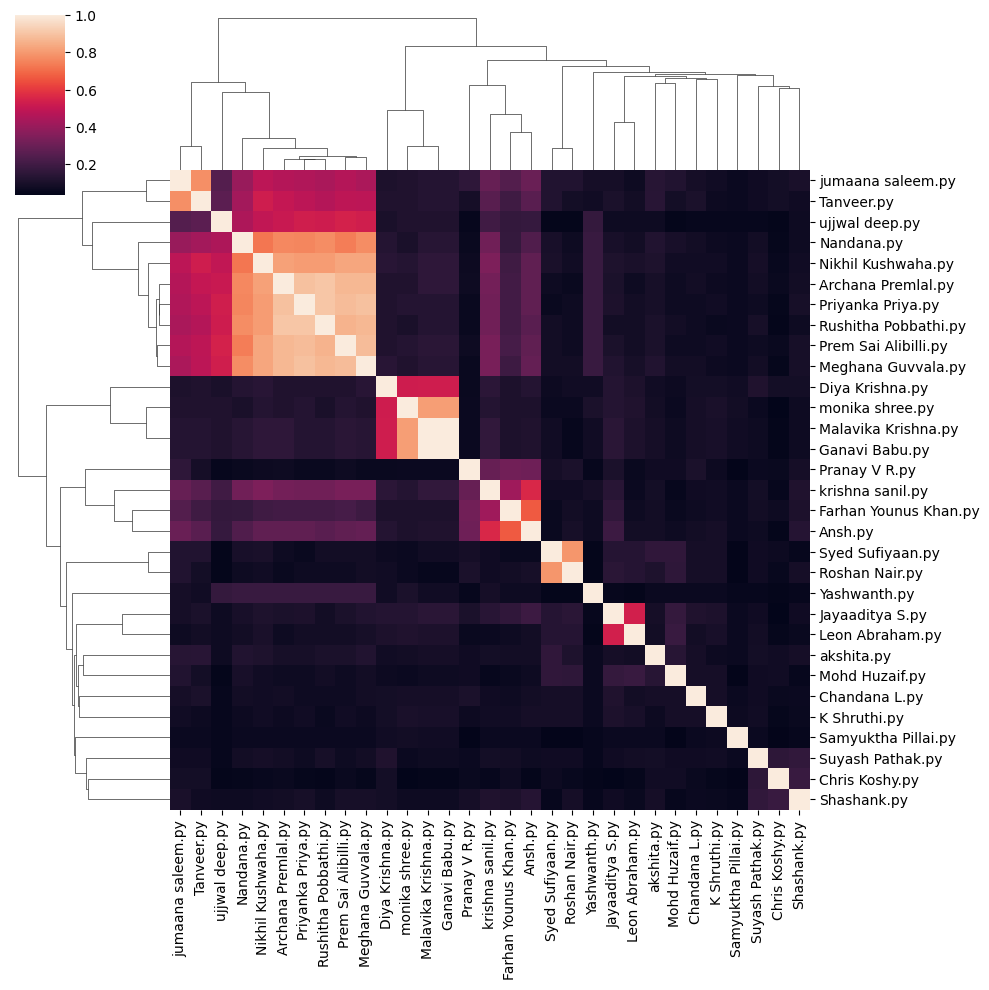

In [53]:
sns.clustermap(sim_score2)